In [1]:
import pandas, numpy, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(12, 8)})

# 0. user-defined variables

In [2]:
data_file = '/home/adrian/gd15/hi/research/huvec/data/targeted/HUVEC_AllMeasurements_Summary_09.11.2021.xlsx'

# 1. read data

In [3]:
df = pandas.read_excel(data_file, header=1)
df = df.iloc[1: , :]
df.head()

,Sample ID,Experiment,Treatment,Timepoint (h),Cell numbers,Na+,Cl-,Glucose,Lactate,Glutamine,...,Aspartic ac,MS Glutamin,MS Glutamic ac,Ornithine,Lysine,Citrulline,Glycin NL,XLeu/Ile/Hopro,Methylhistidin,Phenylalanine
1,1,2,0.0,0.0,480000,121,111,5800,300,2061.070339,...,100.16,1422.455,1577.685,31.58,1509.19,3.705,633.275,842.7,2.165,156.8
2,2,2,0.5,0.0,480000,120,110,5900,400,13548.102359,...,114.53,1576.49,1738.505,34.935,1673.355,4.86,737.03,929.685,2.04,171.59
3,3,2,5.0,0.0,480000,121,111,5900,300,1379.54308,...,104.79,1597.895,1618.63,31.085,1770.46,4.49,746.875,926.1,2.375,166.795
4,4,2,50.0,0.0,480000,120,112,6200,700,1459.603473,...,103.17,1624.73,1547.505,29.82,1858.57,4.695,691.83,871.235,1.72,160.115
5,5,2,0.0,4.0,560000,122,114,4700,2900,3979.601392,...,103.075,1425.89,1535.835,34.91,1628.795,4.05,641.75,813.275,1.86,146.15


# 2. analysis of glucose and lactate

In [4]:
experiments = [2, 3, 7]
treatments = [0, 0.5, 5]
metabolites = ['Glucose', 'Lactate']

In [5]:
for metabolite in metabolites:
    boxes = []
    for treatment in treatments:
        box = []
        for experiment in experiments:
            
            print(metabolite, treatment, experiment)
            
            # amounts
            sub_exp = df[df['Experiment'] == experiment]
            sub_exp_treatment = sub_exp[sub_exp['Treatment'] == treatment]
            end = sub_exp_treatment[sub_exp_treatment['Timepoint (h)'] == 24]
            start = sub_exp_treatment[sub_exp_treatment['Timepoint (h)'] == 4]
            
            concentration_start = start[metabolite].values
            concentration_end = end[metabolite].values
            cells = end['Cell numbers'].values
            
            # concentration begining
            if concentration_start[0] != '-':
                
                cell_factor = numpy.median(cells)/1e3
                difference = numpy.median(concentration_end) - numpy.median(concentration_start)
                plotting_value = difference/cell_factor * (24/20)
                box.append(plotting_value)
                
                print('start', concentration_start, numpy.median(concentration_start))
                print('end', concentration_end, numpy.median(concentration_end))
                print('cells', cells, numpy.median(cells))
            
        # add box to boxes
        print(box)
        print()
        boxes.append(box)
        
    #
    # statistical test
    #
    print('stats')
    print(boxes)
    stat, pvalue = scipy.stats.mannwhitneyu(boxes[0], boxes[1])
    print('statistics AB', stat, pvalue)
    stat, pvalue = scipy.stats.mannwhitneyu(boxes[0], boxes[2])
    print('statistics AC', stat, pvalue)
    
    #
    # linear regression
    #
    print('linear regression')
    x = []; y = []
    for i in range(len(boxes)):
        for element in boxes[i]:
            x.append(i)
            y.append(element)
    print(x)
    print(y)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    print('linear regression', r_value, p_value)
    line = (slope * numpy.array(x)) + intercept
    
    if p_value < 0.05:
        matplotlib.pyplot.plot(x, line, '-', lw=4, color='black', ls='--')
    print('end linear regression')
    
    #    
    # plot figure
    #
    canvas = seaborn.boxplot(data=boxes)
    canvas.artists[0].set_facecolor('white')
    canvas.artists[1].set_facecolor('#2CA02C')
    canvas.artists[2].set_facecolor('#FFA500')
    
    # scatter
    for i in range(len(boxes)):
        for element in boxes[i]:
            matplotlib.pyplot.plot(i, element, 'o', color='black', alpha=0.5, ms=10, mew=0)
    
    # close figure
    matplotlib.pyplot.title(metabolite)
    matplotlib.pyplot.xlabel('Treatment')
    matplotlib.pyplot.ylabel('Transport rate (uM 1e3 cells-1 day-1)')
    matplotlib.pyplot.xticks([0, 1, 2], ['0', '0.5', '5'])
    matplotlib.pyplot.grid(ls=':', alpha=0.5)
    
    #matplotlib.pyplot.show()
    
    matplotlib.pyplot.savefig('{}.svg'.format(metabolite))
    matplotlib.pyplot.close()

Glucose 0 2
start [4700 4600 4900] 4700.0
end [700 900 1000] 900.0
cells [830000 830000 830000] 830000.0
Glucose 0 3
start [4800 4500 5100] 4800.0
end [1700 1200 1100] 1200.0
cells [730000 730000 730000] 730000.0
Glucose 0 7
start [4500 4300 4600] 4500.0
end [1600 1600 1600] 1600.0
cells [550000 550000 550000] 550000.0
[-5.493975903614458, -5.917808219178082, -6.327272727272727]

Glucose 0.5 2
start [4900 4800 4600] 4800.0
end [600 700 1200] 700.0
cells [585000 585000 585000] 585000.0
Glucose 0.5 3
start [4800 4600 4700] 4700.0
end [1300 1300 1300] 1300.0
cells [630000 630000 630000] 630000.0
Glucose 0.5 7
start [4000 4200 4900] 4200.0
end [1600 1900 1600] 1600.0
cells [515000 515000 515000] 515000.0
[-8.41025641025641, -6.476190476190476, -6.058252427184466]

Glucose 5 2
start [5100 5100 4800] 5100.0
end [600 900 600] 600.0
cells [525000 525000 525000] 525000.0
Glucose 5 3
Glucose 5 7
start [4800 4500 5000] 4800.0
end [2000 1700 1700] 1700.0
cells [457000 457000 457000] 457000.0
[-10.

/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.


# 3. analysis of pyruvate

In [6]:
experiments = [6, 5]
treatments = [0, 0.5, 5]
metabolites = ['Pyruvate']

Pyruvate 0 6
start [683.307924820761 724.264654426188 734.856252689623] 724.264654426188
end [259.771924700521 239.051178861704 235.839768525808] 239.051178861704
cells [225000 225000 225000] 225000.0
Pyruvate 0 5
start [762.034286516834 656.481538478053 617.803567193357] 656.481538478053
end [202.262409395077 170.128265428101 212.736745398509] 202.262409395077
cells [650000 650000 650000] 650000.0
[-2.5878052030105816, -0.8385583921531865]

Pyruvate 0.5 6
start [674.496823934728 706.756601095068 658.607979625754] 674.496823934728
end [227.95279344929 232.997159596766 270.90237277284] 232.997159596766
cells [600000 600000 600000] 600000.0
Pyruvate 0.5 5
start [661.34329223649 616.79157587085 659.347757530966] 659.347757530966
end [183.82211906667 181.962087143516 205.809741685095] 183.82211906667
cells [750000 750000 750000] 750000.0
[-0.882999328675924, -0.7608410215428736]

Pyruvate 5 6
start [567.355866548664 520.241054712558 561.328402099757] 561.328402099757
end [157.32786159296 1

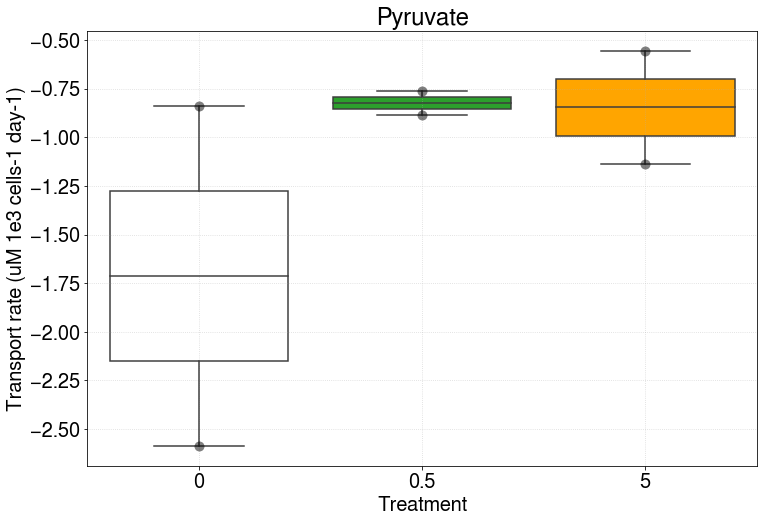

In [7]:
for metabolite in metabolites:
    boxes = []
    for treatment in treatments:
        box = []
        for experiment in experiments:
            
            print(metabolite, treatment, experiment)
            
            # amounts
            sub_exp = df[df['Experiment'] == experiment]
            sub_exp_treatment = sub_exp[sub_exp['Treatment'] == treatment]
            end = sub_exp_treatment[sub_exp_treatment['Timepoint (h)'] == 24]
            start = sub_exp_treatment[sub_exp_treatment['Timepoint (h)'] == 4]
            
            concentration_start = start[metabolite].values
            concentration_end = end[metabolite].values
            cells = end['Cell numbers'].values
            
            # concentration begining
            if concentration_start[0] != '-':
                
                cell_factor = numpy.median(cells)/1e3
                difference = numpy.median(concentration_end) - numpy.median(concentration_start)
                plotting_value = difference/cell_factor * (24/20)
                box.append(plotting_value)
                
                print('start', concentration_start, numpy.median(concentration_start))
                print('end', concentration_end, numpy.median(concentration_end))
                print('cells', cells, numpy.median(cells))
            
        # add box to boxes
        print(box)
        print()
        boxes.append(box)
        
    #
    # statistical test
    #
    print('stats')
    print(boxes)
    stat, pvalue = scipy.stats.mannwhitneyu(boxes[0], boxes[1])
    print('statistics AB', stat, pvalue)
    stat, pvalue = scipy.stats.mannwhitneyu(boxes[0], boxes[2])
    print('statistics AC', stat, pvalue)
    
    #
    # linear regression
    #
    print('linear regression')
    x = []; y = []
    for i in range(len(boxes)):
        for element in boxes[i]:
            x.append(i)
            y.append(element)
    print(x)
    print(y)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    print('linear regression', r_value, p_value)
    line = (slope * numpy.array(x)) + intercept
    
    if p_value < 0.05:
        matplotlib.pyplot.plot(x, line, '-', lw=4, color='black', ls=':')
    print('end linear regression')
     
    #    
    # plot figure
    #
    canvas = seaborn.boxplot(data=boxes)
    canvas.artists[0].set_facecolor('white')
    canvas.artists[1].set_facecolor('#2CA02C')
    canvas.artists[2].set_facecolor('#FFA500')
    
    # scatter
    for i in range(len(boxes)):
        for element in boxes[i]:
            matplotlib.pyplot.plot(i, element, 'o', color='black', alpha=0.5, ms=10, mew=0)
    
    # close figure
    matplotlib.pyplot.title(metabolite)
    matplotlib.pyplot.xlabel('Treatment')
    matplotlib.pyplot.ylabel('Transport rate (uM 1e3 cells-1 day-1)')
    matplotlib.pyplot.xticks([0, 1, 2], ['0', '0.5', '5'])
    matplotlib.pyplot.grid(ls=':', alpha=0.5)
    matplotlib.pyplot.show()            

# 4. analysis of amino acids

In [8]:
experiments = [2, 6, 7]
treatments = [0, 0.5, 5]

metabolites = df.columns[12:33].to_list()
print(metabolites, len(metabolites))

['Glycine', 'Serine', 'Threonine', 'Arg', 'Pro', 'Ala', 'Val', 'Met', 'His', 'Tyr av', 'Tryptophan', 'Aspartic ac', 'MS Glutamin', 'MS Glutamic ac', 'Ornithine', 'Lysine', 'Citrulline', 'Glycin NL', 'XLeu/Ile/Hopro', 'Methylhistidin', 'Phenylalanine'] 21


In [9]:
metabolites.remove('Glycin NL')

print(metabolites, len(metabolites))

['Glycine', 'Serine', 'Threonine', 'Arg', 'Pro', 'Ala', 'Val', 'Met', 'His', 'Tyr av', 'Tryptophan', 'Aspartic ac', 'MS Glutamin', 'MS Glutamic ac', 'Ornithine', 'Lysine', 'Citrulline', 'XLeu/Ile/Hopro', 'Methylhistidin', 'Phenylalanine'] 20


In [10]:
metabolite_names = {}
for metabolite in metabolites:
    metabolite_names[metabolite] = metabolite
    
    if metabolite == 'Arg':
        metabolite_names[metabolite] = 'Arginine'
        
    if metabolite == 'Pro':
        metabolite_names[metabolite] = 'Proline'
        
    if metabolite == 'Ala':
        metabolite_names[metabolite] = 'Alanine'
        
    if metabolite == 'Val':
        metabolite_names[metabolite] = 'Valine'
        
    if metabolite == 'Met':
        metabolite_names[metabolite] = 'Methionine'
        
    if metabolite == 'His':
        metabolite_names[metabolite] = 'Histidine'
        
    if metabolite == 'Tyr av':
        metabolite_names[metabolite] = 'Tyrosine'
        
    if metabolite == 'Aspartic ac':
        metabolite_names[metabolite] = 'Aspartate'
        
    if metabolite == 'MS Glutamin':
        metabolite_names[metabolite] = 'Glutamine'
        
    if metabolite == 'MS Glutamic ac':
        metabolite_names[metabolite] = 'Glutamate'

Glycine 0 2
start [44.545 51.525 50] 50.0
end [89.52 87.395 90.385] 89.52
cells [830000 830000 830000] 830000.0
Glycine 0 6
start [30.725 34.76 34.455] 34.455
end [41.97 48.17 38.5] 41.97
cells [225000 225000 225000] 225000.0
Glycine 0 7
start [49.825 29.985 27.385] 29.985
end [77.74 60.435 77.645] 77.645
cells [550000 550000 550000] 550000.0
[0.057137349397590353, 0.04008, 0.10398545454545453]

Glycine 0.5 2
start [47.05 49.715 45.83] 47.05
end [97.385 94.915 106.295] 97.385
cells [585000 585000 585000] 585000.0
Glycine 0.5 6
start [32.17 32.02 33.88] 32.17
end [49.825 52.38 58.6] 52.38
cells [600000 600000 600000] 600000.0
Glycine 0.5 7
start [30.585 26.055 46.215] 30.585
end [77.465 71.72 67.83] 71.72
cells [515000 515000 515000] 515000.0
[0.10325128205128208, 0.040420000000000005, 0.09584854368932039]

Glycine 5 2
start [48.43 48.855 50.88] 48.855
end [78.425 90.035 79.755] 79.755
cells [525000 525000 525000] 525000.0
Glycine 5 6
start [37.77 30.205 26.06] 30.205
end [52.125 44.33 

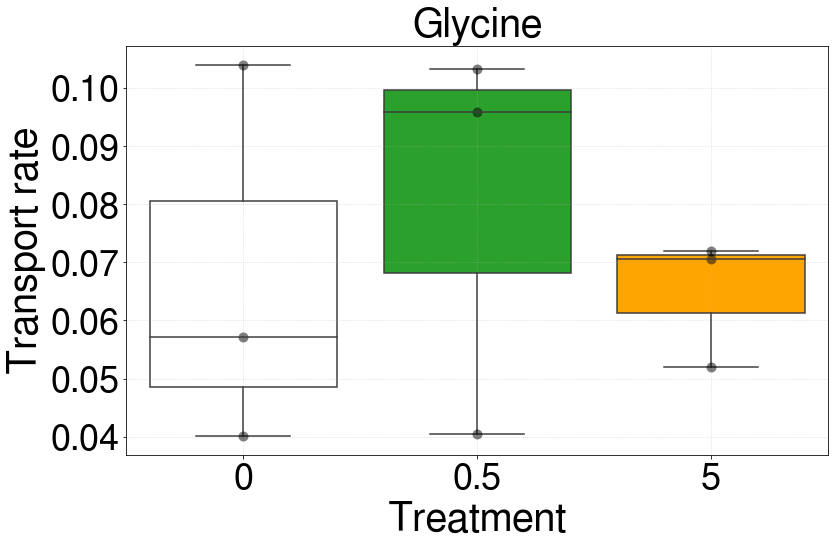

Serine 0 2
start [20.79 25.66 23.62] 23.62
end [12.98 14.295 14.93] 14.295
cells [830000 830000 830000] 830000.0
Serine 0 6
start [15.31 20.19 17.405] 17.405
end [11.865 13.02 10.38] 11.865
cells [225000 225000 225000] 225000.0
Serine 0 7
start [23.345 13.63 13.1] 13.63
end [13.19 10.455 13.53] 13.19
cells [550000 550000 550000] 550000.0
[-0.013481927710843375, -0.02954666666666667, -0.0009600000000000027]

Serine 0.5 2
start [21.73 23.02 21.8] 21.8
end [15.325 13 16.95] 15.325
cells [585000 585000 585000] 585000.0
Serine 0.5 6
start [17.25 17.13 17.885] 17.25
end [14.665 16.02 19.01] 16.02
cells [600000 600000 600000] 600000.0
Serine 0.5 7
start [13.835 12.705 16.72] 13.835
end [12.15 11.43 10.265] 11.43
cells [515000 515000 515000] 515000.0
[-0.013282051282051283, -0.002460000000000001, -0.005603883495145633]

Serine 5 2
start [21.515 22.055 21.96] 21.96
end [12.135 13.565 12.735] 12.735
cells [525000 525000 525000] 525000.0
Serine 5 6
start [19.53 15.775 12.895] 15.775
end [15.665 1

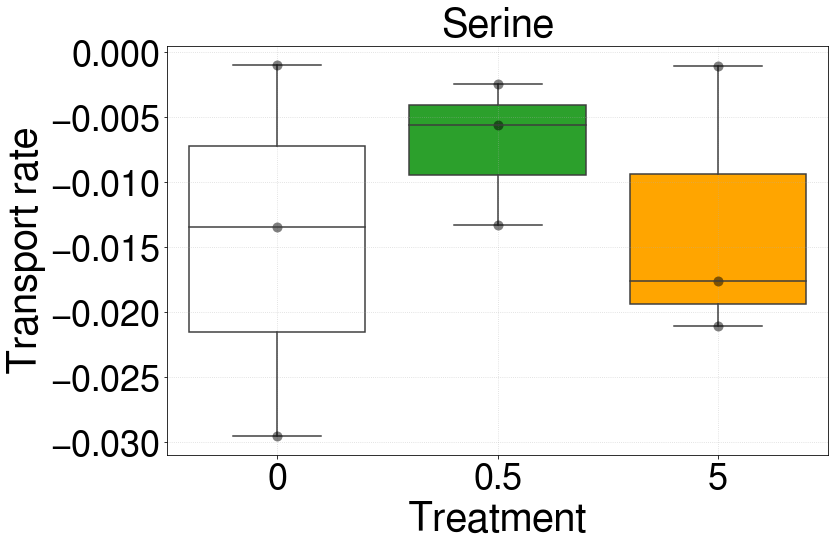

Threonine 0 2
start [6.81 7.97 7.2] 7.2
end [3.925 3.695 5.17] 3.925
cells [830000 830000 830000] 830000.0
Threonine 0 6
start [4.905 6.45 5.83] 5.83
end [3.5 3.91 3.22] 3.5
cells [225000 225000 225000] 225000.0
Threonine 0 7
start [7.38 4.255 3.965] 4.255
end [2.955 2.23 3.34] 2.955
cells [550000 550000 550000] 550000.0
[-0.004734939759036145, -0.012426666666666666, -0.002836363636363636]

Threonine 0.5 2
start [6.83 6.65 6.46] 6.65
end [4.09 4.51 5.685] 4.51
cells [585000 585000 585000] 585000.0
Threonine 0.5 6
start [5.355 5.61 5.625] 5.61
end [4.395 4.805 5.95] 4.805
cells [600000 600000 600000] 600000.0
Threonine 0.5 7
start [4.14 3.78 5.52] 4.14
end [3.015 2.67 2.425] 2.67
cells [515000 515000 515000] 515000.0
[-0.0043897435897435905, -0.0016100000000000012, -0.0034252427184466015]

Threonine 5 2
start [6.17 7.075 6.9] 6.9
end [3.445 4.18 3.425] 3.445
cells [525000 525000 525000] 525000.0
Threonine 5 6
start [5.9 5.065 3.99] 5.065
end [4.64 4.38 4.46] 4.46
cells [429000 429000 42

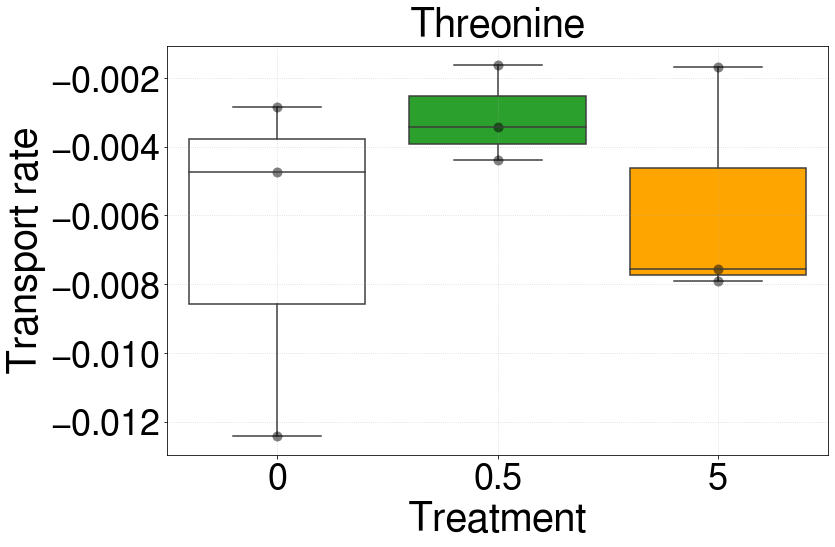

Arg 0 2
start [193.885 233.28 234.51] 233.28
end [183.805 185.83 211.625] 185.83
cells [830000 830000 830000] 830000.0
Arg 0 6
start [140.325 181.8 171.415] 171.415
end [128.46 146.87 118.23] 128.46
cells [225000 225000 225000] 225000.0
Arg 0 7
start [215.07 128.575 117.34] 128.575
end [180 128.965 153.185] 153.185
cells [550000 550000 550000] 550000.0
[-0.0686024096385542, -0.22909333333333323, 0.05369454545454548]

Arg 0.5 2
start [220.035 221.825 198.945] 220.035
end [212.07 202.665 237.67] 212.07
cells [585000 585000 585000] 585000.0
Arg 0.5 6
start [163.78 158.97 166.46] 163.78
end [157.58 169.935 195.505] 169.935
cells [600000 600000 600000] 600000.0
Arg 0.5 7
start [126.555 113.41 136.275] 126.555
end [171.03 162.195 146.69] 162.195
cells [515000 515000 515000] 515000.0
[-0.016338461538461545, 0.012310000000000001, 0.08304466019417471]

Arg 5 2
start [220.685 215.95 232.65] 220.685
end [192.585 214.175 198.82] 198.82
cells [525000 525000 525000] 525000.0
Arg 5 6
start [191.235 1

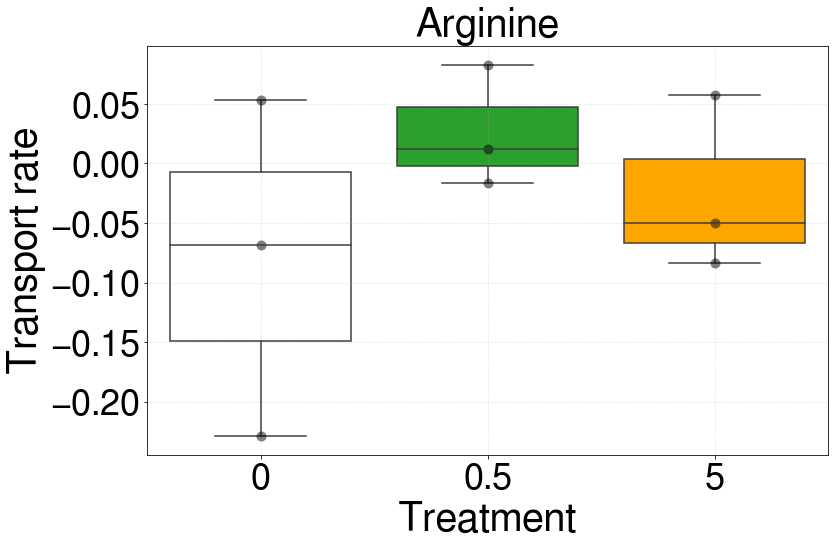

Pro 0 2
start [236.305 258.005 240.17] 240.17
end [458.58 434.025 454.595] 454.595
cells [830000 830000 830000] 830000.0
Pro 0 6
start [166 205.52 200.055] 200.055
end [211.665 250.385 196.805] 211.665
cells [225000 225000 225000] 225000.0
Pro 0 7
start [320.715 160.21 157.04] 160.21
end [487.285 347.725 453.89] 453.89
cells [550000 550000 550000] 550000.0
[0.3100120481927711, 0.06191999999999992, 0.6407563636363636]

Pro 0.5 2
start [247.065 271.55 252.505] 252.505
end [475.545 472.39 515.475] 475.545
cells [585000 585000 585000] 585000.0
Pro 0.5 6
start [177.485 161.95 188.955] 177.485
end [253.665 237.725 254.225] 253.665
cells [600000 600000 600000] 600000.0
Pro 0.5 7
start [183.985 158.265 181.195] 181.195
end [443.645 441.12 425.005] 441.12
cells [515000 515000 515000] 515000.0
[0.4575179487179487, 0.15235999999999997, 0.6056504854368931]

Pro 5 2
start [244.525 225.99 236.51] 236.51
end [468.005 488.585 438.785] 468.005
cells [525000 525000 525000] 525000.0
Pro 5 6
start [219.23

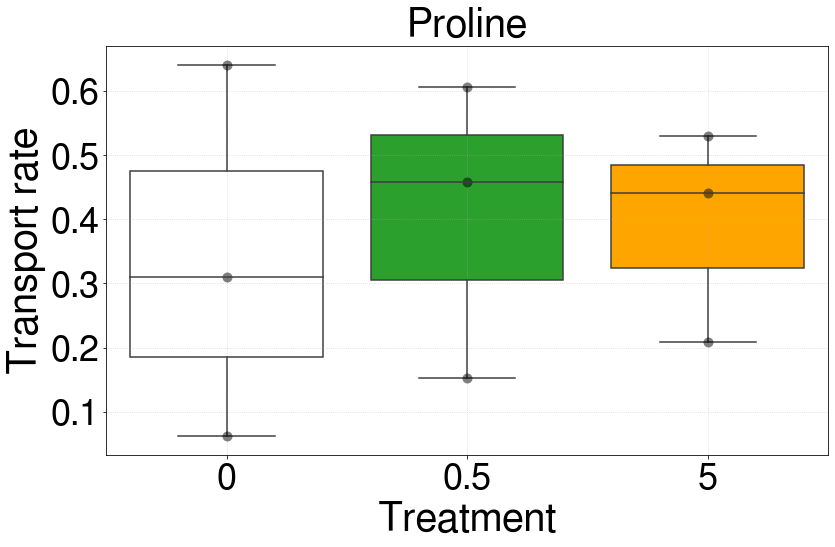

Ala 0 2
start [48.755 58.7 60.64] 58.7
end [134.13 137.255 133.69] 134.13
cells [830000 830000 830000] 830000.0
Ala 0 6
start [28.48 34.725 34.04] 34.04
end [36.745 44.785 37.675] 37.675
cells [225000 225000 225000] 225000.0
Ala 0 7
start [89.66 44.955 48.97] 48.97
end [140.01 104.155 160.69] 140.01
cells [550000 550000 550000] 550000.0
[0.10905542168674698, 0.019386666666666656, 0.19863272727272727]

Ala 0.5 2
start [57.62 48.075 51.36] 51.36
end [143.555 142.585 158.05] 143.555
cells [585000 585000 585000] 585000.0
Ala 0.5 6
start [27.765 33.775 30.405] 30.405
end [55.19 55.995 54.875] 55.19
cells [600000 600000 600000] 600000.0
Ala 0.5 7
start [47.205 45.06 32.25] 45.06
end [155.43 143.665 134.13] 143.665
cells [515000 515000 515000] 515000.0
[0.18911794871794874, 0.049569999999999996, 0.22975922330097084]

Ala 5 2
start [57.045 52.215 55.89] 55.89
end [135.245 146.6 130.74] 135.245
cells [525000 525000 525000] 525000.0
Ala 5 6
start [34.91 29.8 25.135] 29.8
end [55.81 51.54 55.935]

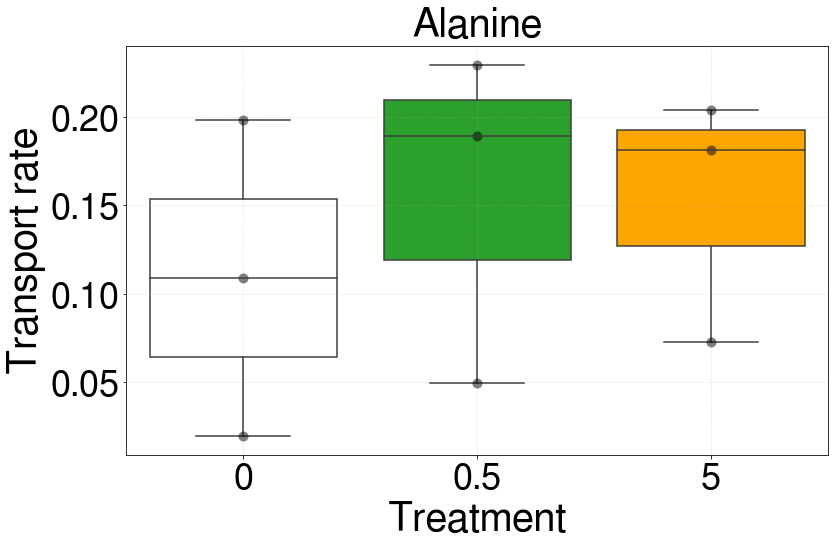

Val 0 2
start [624.85 721.935 692.41] 692.41
end [615.585 655.88 712.645] 655.88
cells [830000 830000 830000] 830000.0
Val 0 6
start [451.825 565.24 516.805] 516.805
end [435.245 449.66 405.89] 435.245
cells [225000 225000 225000] 225000.0
Val 0 7
start [659.375 385.95 394.92] 394.92
end [656.46 467.07 625.975] 625.975
cells [550000 550000 550000] 550000.0
[-0.05281445783132526, -0.43498666666666636, 0.50412]

Val 0.5 2
start [641.57 686.05 575.14] 641.57
end [685.375 668.74 731.615] 685.375
cells [585000 585000 585000] 585000.0
Val 0.5 6
start [499.06 469.635 500.69] 499.06
end [517.86 525.9 611.4] 525.9
cells [600000 600000 600000] 600000.0
Val 0.5 7
start [427.385 394 462.27] 427.385
end [625.59 557.28 494.925] 557.28
cells [515000 515000 515000] 515000.0
[0.08985641025641014, 0.05367999999999995, 0.3026679611650485]

Val 5 2
start [613.9 636.74 697.59] 636.74
end [599.42 690.93 625.555] 625.555
cells [525000 525000 525000] 525000.0
Val 5 6
start [563.685 505.245 401.88] 505.245
end

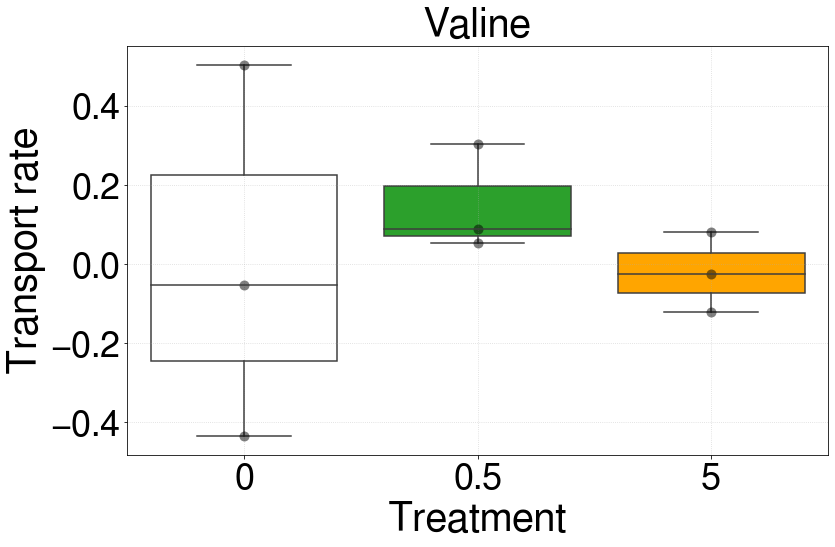

Met 0 2
start [72.71 86.585 84.6] 84.6
end [62.61 57.65 66.995] 62.61
cells [830000 830000 830000] 830000.0
Met 0 6
start [52.03 72.54 64.11] 64.11
end [49.905 53.28 44.235] 49.905
cells [225000 225000 225000] 225000.0
Met 0 7
start [86.785 51.525 45.835] 51.525
end [68.675 48.61 70.1] 68.675
cells [550000 550000 550000] 550000.0
[-0.03179277108433734, -0.07575999999999998, 0.037418181818181816]

Met 0.5 2
start [79.03 76.085 74.625] 76.085
end [68.38 71.275 86.815] 71.275
cells [585000 585000 585000] 585000.0
Met 0.5 6
start [60.765 58.295 58.29] 58.295
end [61.375 67.825 71.105] 67.825
cells [600000 600000 600000] 600000.0
Met 0.5 7
start [50.305 44.58 55.715] 50.305
end [67.14 61.775 55.945] 61.775
cells [515000 515000 515000] 515000.0
[-0.009866666666666642, 0.019060000000000004, 0.026726213592233008]

Met 5 2
start [84.255 80.68 80.88] 80.88
end [61.95 71.08 57.975] 61.95
cells [525000 525000 525000] 525000.0
Met 5 6
start [76.025 55.505 47.55] 55.505
end [70.055 61.085 59.385] 61

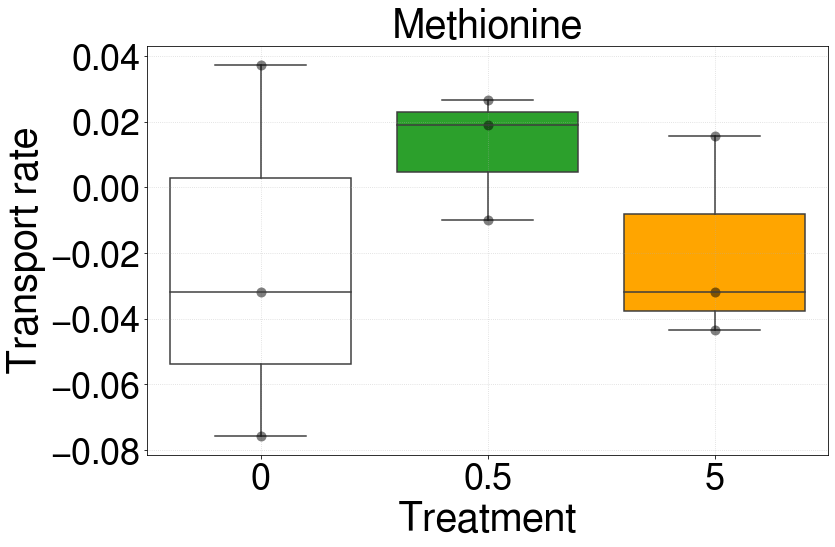

His 0 2
start [290.65 339.5 350.7] 339.5
end [321.395 330.9 346.56] 330.9
cells [830000 830000 830000] 830000.0
His 0 6
start [233.51 297.855 284.865] 284.865
end [232.155 275.63 217.385] 232.155
cells [225000 225000 225000] 225000.0
His 0 7
start [354.89 205 189.5] 205.0
end [356.62 225.415 323.91] 323.91
cells [550000 550000 550000] 550000.0
[-0.01243373493975907, -0.28112000000000004, 0.25944000000000006]

His 0.5 2
start [324.58 325.17 310.535] 324.58
end [372.445 372.145 403.415] 372.445
cells [585000 585000 585000] 585000.0
His 0.5 6
start [241.235 226.22 254.385] 241.235
end [274.465 246.495 285.63] 274.465
cells [600000 600000 600000] 600000.0
His 0.5 7
start [209.255 187.005 215.685] 209.255
end [317.62 323 310.845] 317.62
cells [515000 515000 515000] 515000.0
[0.0981846153846154, 0.06645999999999992, 0.2525009708737864]

His 5 2
start [302.43 268.685 289.38] 289.38
end [331.415 347.795 311.95] 331.415
cells [525000 525000 525000] 525000.0
His 5 6
start [304.59 248.395 201.775

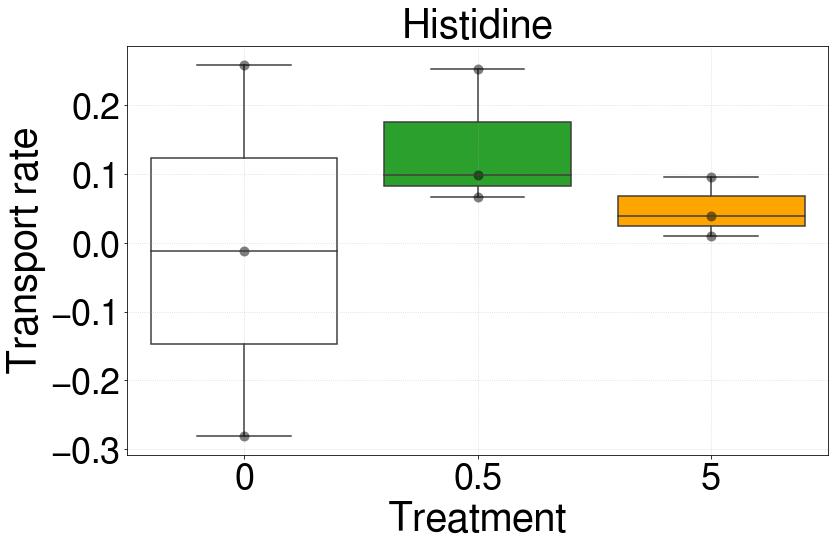

Tyr av 0 2
start [68.515 83.17 81.1] 81.1
end [58.315 59.88 66.965] 59.88
cells [830000 830000 830000] 830000.0
Tyr av 0 6
start [51.88 62.985 61.56] 61.56
end [43.77 49.015 42.565] 43.77
cells [225000 225000 225000] 225000.0
Tyr av 0 7
start [81.785 47.37 42.295] 47.37
end [59.88 42.505 57.825] 57.825
cells [550000 550000 550000] 550000.0
[-0.030679518072289143, -0.09487999999999999, 0.022810909090909104]

Tyr av 0.5 2
start [73.88 76.16 72.29] 73.88
end [65.56 65.615 76.385] 65.615
cells [585000 585000 585000] 585000.0
Tyr av 0.5 6
start [55.74 57.285 57.585] 57.285
end [54.265 58.545 66.74] 58.545
cells [600000 600000 600000] 600000.0
Tyr av 0.5 7
start [46.32 41.325 55.465] 46.32
end [58.015 50.545 46.195] 50.545
cells [515000 515000 515000] 515000.0
[-0.016953846153846153, 0.00252000000000001, 0.00984466019417476]

Tyr av 5 2
start [74.425 80.615 83.37] 80.615
end [59.695 67.06 61.49] 61.49
cells [525000 525000 525000] 525000.0
Tyr av 5 6
start [66.505 55.735 42.775] 55.735
end [6

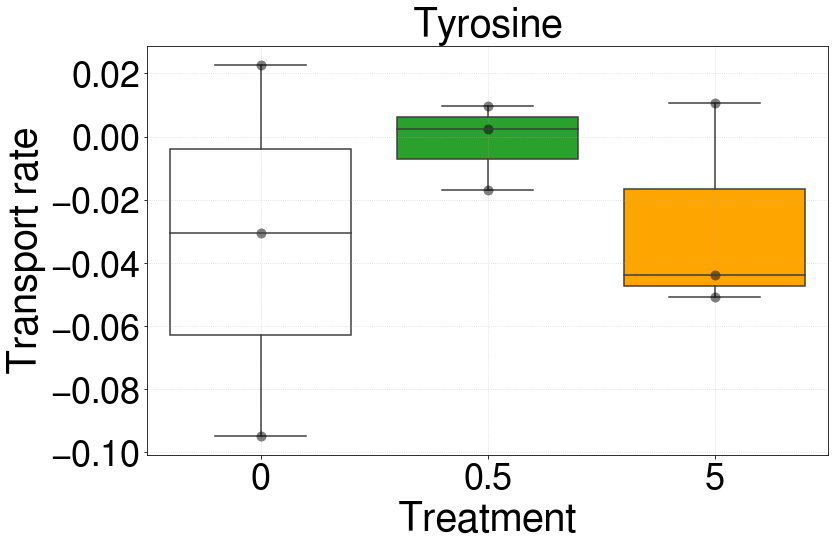

Tryptophan 0 2
start [68.6 91.335 91.31] 91.31
end [84.935 90.09 102.73] 90.09
cells [830000 830000 830000] 830000.0
Tryptophan 0 6
start [47.635 59.93 59.12] 59.12
end [45.46 51.9 40.54] 45.46
cells [225000 225000 225000] 225000.0
Tryptophan 0 7
start [77.365 47.74 43.85] 47.74
end [92.875 64.65 101.87] 92.875
cells [550000 550000 550000] 550000.0
[-0.0017638554216867454, -0.07285333333333331, 0.09847636363636364]

Tryptophan 0.5 2
start [81.175 78.93 76.98] 78.93
end [104.06 91.1 108.16] 104.06
cells [585000 585000 585000] 585000.0
Tryptophan 0.5 6
start [56.25 56.71 54.26] 56.25
end [57.42 64.995 77.955] 64.995
cells [600000 600000 600000] 600000.0
Tryptophan 0.5 7
start [46.09 41.06 45.96] 45.96
end [96.155 81.15 79.01] 81.15
cells [515000 515000 515000] 515000.0
[0.05154871794871794, 0.01749000000000001, 0.08199611650485437]

Tryptophan 5 2
start [73.805 84.405 93.97] 84.405
end [84.01 101.895 95.055] 95.055
cells [525000 525000 525000] 525000.0
Tryptophan 5 6
start [63.29 51.275 

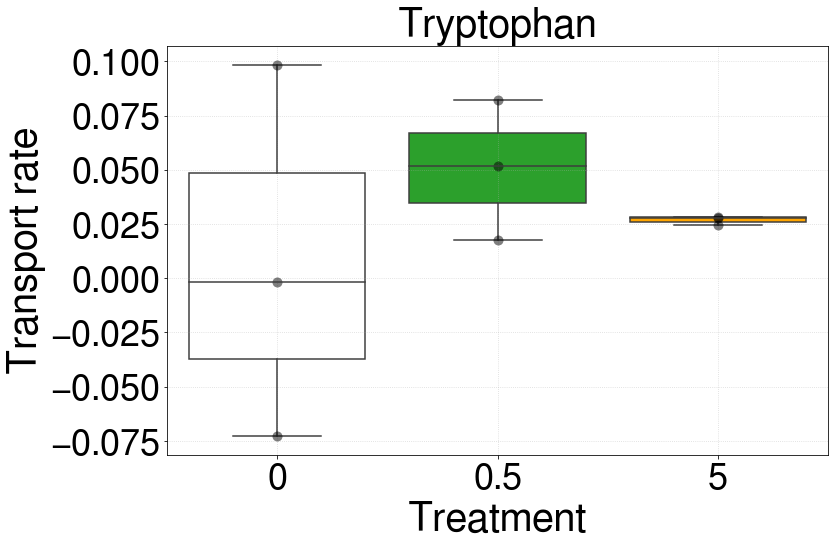

Aspartic ac 0 2
start [103.075 121.525 110.37] 110.37
end [115.18 113.625 123.17] 115.18
cells [830000 830000 830000] 830000.0
Aspartic ac 0 6
start [69.545 90.335 83.43] 83.43
end [65.76 78.445 61.845] 65.76
cells [225000 225000 225000] 225000.0
Aspartic ac 0 7
start [119.905 68.675 60.67] 68.675
end [121.245 89.035 127.33] 121.245
cells [550000 550000 550000] 550000.0
[0.006954216867469882, -0.09424, 0.11469818181818184]

Aspartic ac 0.5 2
start [106.005 118.92 103.545] 106.005
end [122.52 119.38 135.595] 122.52
cells [585000 585000 585000] 585000.0
Aspartic ac 0.5 6
start [82.26 79.755 84.52] 82.26
end [84.23 87.04 93.4] 87.04
cells [600000 600000 600000] 600000.0
Aspartic ac 0.5 7
start [67.88 62.37 73.98] 67.88
end [120.275 105.725 99.665] 105.725
cells [515000 515000 515000] 515000.0
[0.033876923076923075, 0.009560000000000003, 0.08818252427184466]

Aspartic ac 5 2
start [107.135 102.415 116.72] 107.135
end [116.53 129.235 123.785] 123.785
cells [525000 525000 525000] 525000.0
As

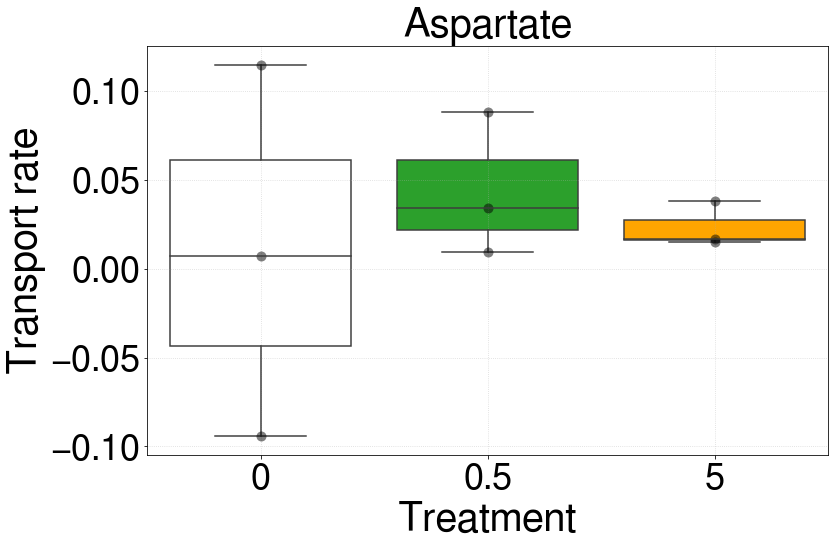

MS Glutamin 0 2
start [1425.89 1666.37 1491.13] 1491.13
end [1605.725 1529.19 1634.765] 1605.725
cells [830000 830000 830000] 830000.0
MS Glutamin 0 6
start [979.075 1272.95 1220.465] 1220.465
end [1050.34 1293.28 1016.555] 1050.34
cells [225000 225000 225000] 225000.0
MS Glutamin 0 7
start [2134.26 1134.595 982.57] 1134.595
end [1833.505 1188.94 1640.795] 1640.795
cells [550000 550000 550000] 550000.0
[0.16567951807228887, -0.9073333333333332, 1.1044363636363637]

MS Glutamin 0.5 2
start [1529.65 1520.89 1372.925] 1520.89
end [1729.35 1678.635 1930.555] 1729.35
cells [585000 585000 585000] 585000.0
MS Glutamin 0.5 6
start [1141.585 1123.955 1236.525] 1141.585
end [1363.49 1295.375 1422.125] 1363.49
cells [600000 600000 600000] 600000.0
MS Glutamin 0.5 7
start [1179.55 1047.28 1169.765] 1169.765
end [1630.93 1545.18 1432.915] 1545.18
cells [515000 515000 515000] 515000.0
[0.427610256410256, 0.4438099999999999, 0.8747533980582523]

MS Glutamin 5 2
start [1652.52 1490.575 1600.52] 1600.5

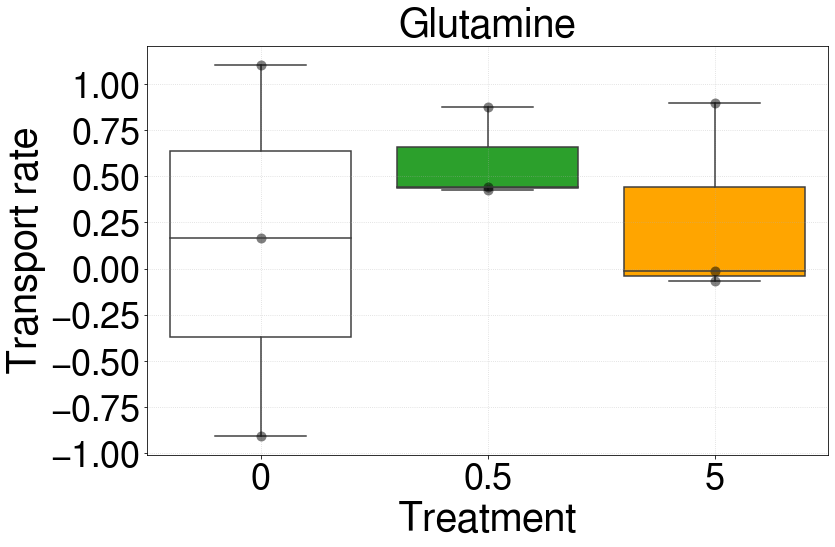

MS Glutamic ac 0 2
start [1535.835 2004.425 2020.5] 2004.425
end [1948.265 2050.09 2198.2] 2050.09
cells [830000 830000 830000] 830000.0
MS Glutamic ac 0 6
start [1087.4 1391.195 1324.91] 1324.91
end [1081.565 1274.02 987.17] 1081.565
cells [225000 225000 225000] 225000.0
MS Glutamic ac 0 7
start [1774.25 1135.37 1015.195] 1135.37
end [2153.74 1502.62 2086.45] 2086.45
cells [550000 550000 550000] 550000.0
[0.06602168674698823, -1.29784, 2.0750836363636362]

MS Glutamic ac 0.5 2
start [1906.215 1865.25 1688.565] 1865.25
end [2290.185 2095.33 2437.19] 2290.185
cells [585000 585000 585000] 585000.0
MS Glutamic ac 0.5 6
start [1285.04 1263.515 1328.56] 1285.04
end [1329.135 1403.045 1678.37] 1403.045
cells [600000 600000 600000] 600000.0
MS Glutamic ac 0.5 7
start [1120.77 983.115 1069.07] 1069.07
end [2104.145 1888.4 1751.205] 1888.4
cells [515000 515000 515000] 515000.0
[0.8716615384615384, 0.23601000000000022, 1.909118446601942]

MS Glutamic ac 5 2
start [1804.52 1787.45 2093.37] 1804.5

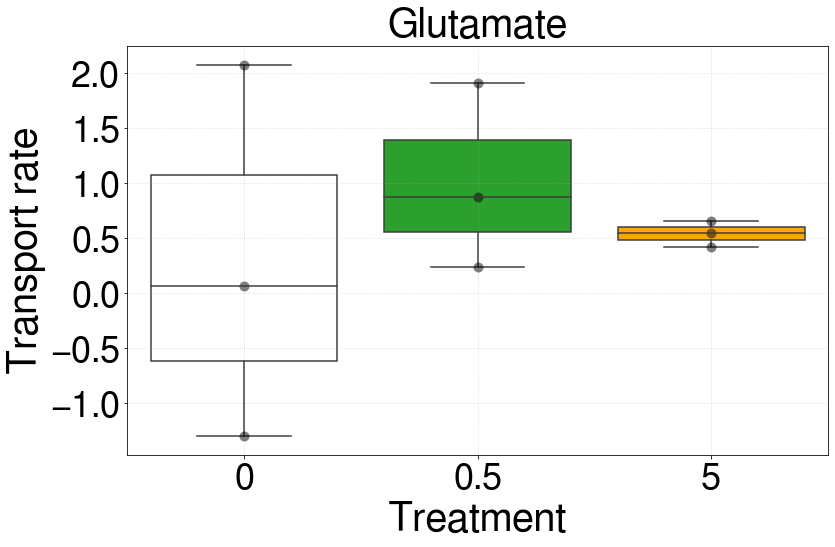

Ornithine 0 2
start [34.91 45.85 38.88] 38.88
end [36.185 38.585 38.305] 38.305
cells [830000 830000 830000] 830000.0
Ornithine 0 6
start [26.83 29.39 25.36] 26.83
end [23.12 26.43 22.38] 23.12
cells [225000 225000 225000] 225000.0
Ornithine 0 7
start [46.37 28.785 25.195] 28.785
end [42.06 28.94 71.47] 42.06
cells [550000 550000 550000] 550000.0
[-0.0008313253012048234, -0.01978666666666665, 0.028963636363636365]

Ornithine 0.5 2
start [33.89 36.245 39.695] 36.245
end [36.495 35.94 37.945] 36.495
cells [585000 585000 585000] 585000.0
Ornithine 0.5 6
start [27.795 27.495 25.445] 27.495
end [28.77 31.51 32.49] 31.51
cells [600000 600000 600000] 600000.0
Ornithine 0.5 7
start [33.6 25.73 30.635] 30.635
end [46.415 35.585 37.535] 37.535
cells [515000 515000 515000] 515000.0
[0.0005128205128205128, 0.00803, 0.01607766990291261]

Ornithine 5 2
start [31.37 32.27 34.99] 32.27
end [35.47 37.27 36.19] 36.19
cells [525000 525000 525000] 525000.0
Ornithine 5 6
start [33.895 26.685 26.605] 26.685

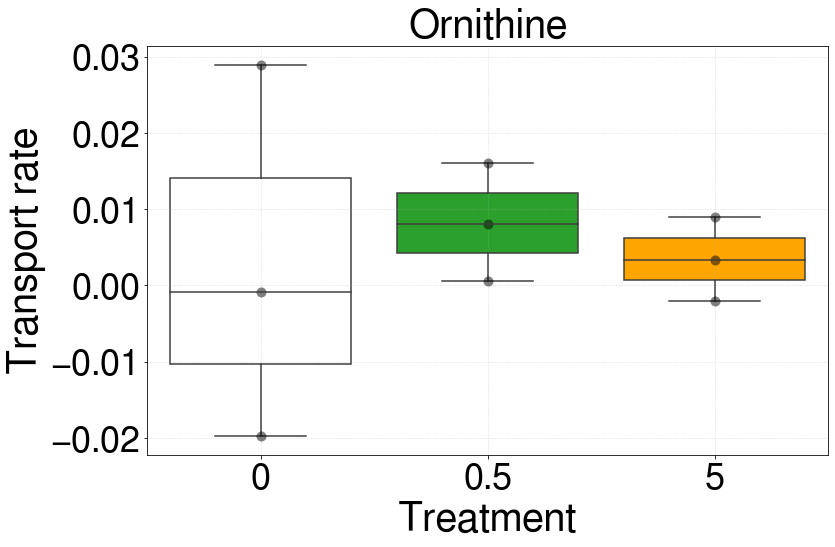

Lysine 0 2
start [1628.795 1751.87 1492.69] 1628.795
end [1682.56 1515.34 1565.82] 1565.82
cells [830000 830000 830000] 830000.0
Lysine 0 6
start [943.705 1295.005 1194.305] 1194.305
end [1017.375 1264.805 962.365] 1017.375
cells [225000 225000 225000] 225000.0
Lysine 0 7
start [2130.99 1029.99 873.455] 1029.99
end [1917.115 1238.34 1527.885] 1527.885
cells [550000 550000 550000] 550000.0
[-0.09104819277108453, -0.943626666666667, 1.0863163636363635]

Lysine 0.5 2
start [1646.07 1712.84 1491.005] 1646.07
end [1656.895 1634.205 1929.705] 1656.895
cells [585000 585000 585000] 585000.0
Lysine 0.5 6
start [1120.835 967.105 1154.405] 1120.835
end [1347.065 1518.675 1505.16] 1505.16
cells [600000 600000 600000] 600000.0
Lysine 0.5 7
start [1023.415 894.48 1180.06] 1023.415
end [1489.42 1460.93 1345.875] 1460.93
cells [515000 515000 515000] 515000.0
[0.022205128205128297, 0.7686500000000002, 1.0194524271844663]

Lysine 5 2
start [1679.365 1479.945 1464.25] 1479.945
end [1640.42 1717.515 1674.

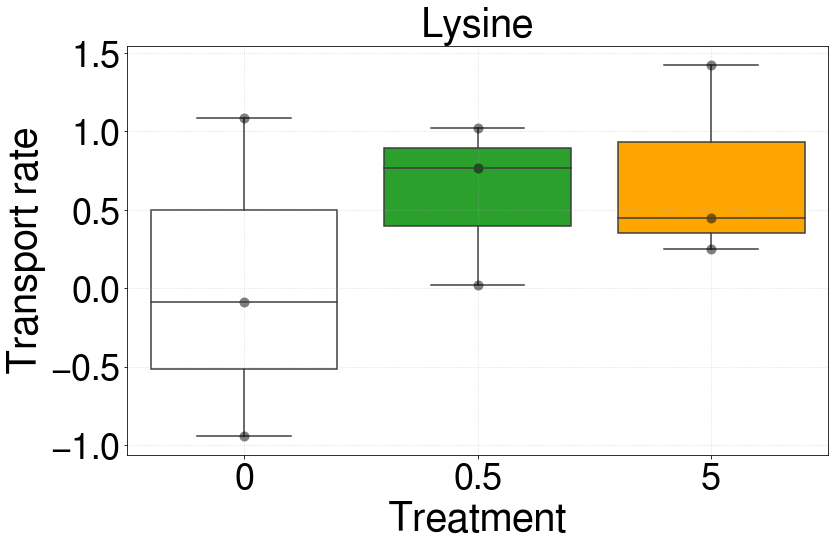

Citrulline 0 2
start [4.05 4.81 4.4] 4.4
end [4.06 5.555 4.93] 4.93
cells [830000 830000 830000] 830000.0
Citrulline 0 6
start [2.78 3.74 3.205] 3.205
end [2.875 3.245 2.14] 2.875
cells [225000 225000 225000] 225000.0
Citrulline 0 7
start [4.485 2.28 2.1] 2.28
end [3.9 3.27 4.525] 3.9
cells [550000 550000 550000] 550000.0
[0.000766265060240963, -0.0017600000000000003, 0.0035345454545454547]

Citrulline 0.5 2
start [4.2 5.38 4.12] 4.2
end [4.64 4.945 4.915] 4.915
cells [585000 585000 585000] 585000.0
Citrulline 0.5 6
start [2.885 2.73 2.835] 2.835
end [3.575 3.445 3.93] 3.575
cells [600000 600000 600000] 600000.0
Citrulline 0.5 7
start [2.645 2.405 3.045] 2.645
end [4.005 3.555 3.445] 3.555
cells [515000 515000 515000] 515000.0
[0.0014666666666666662, 0.0014800000000000004, 0.002120388349514563]

Citrulline 5 2
start [4.555 4.65 4.95] 4.65
end [3.885 4.55 3.7] 3.885
cells [525000 525000 525000] 525000.0
Citrulline 5 6
start [3.425 2.91 2.815] 2.91
end [4.595 3.43 3.37] 3.43
cells [42900

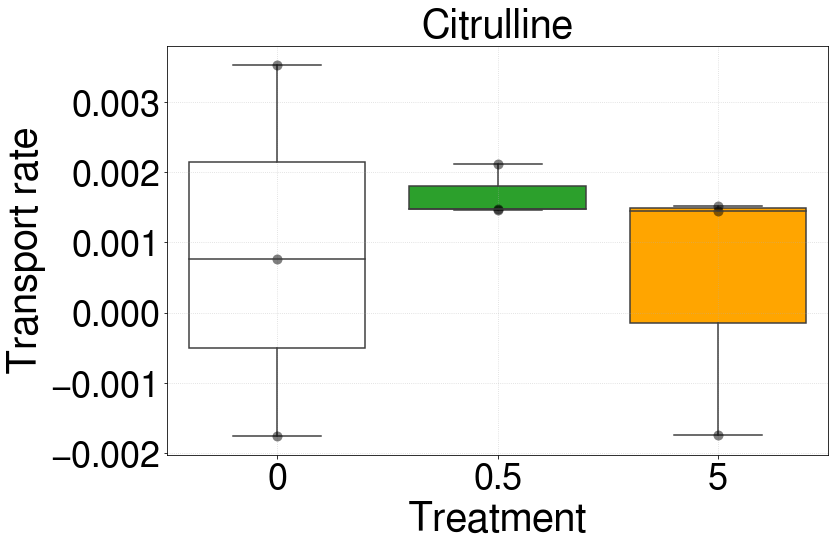

XLeu/Ile/Hopro 0 2
start [813.275 986.55 951.77] 951.77
end [822.755 875.8 955.11] 875.8
cells [830000 830000 830000] 830000.0
XLeu/Ile/Hopro 0 6
start [601.58 751.38 733.975] 733.975
end [551.465 640.42 507.69] 551.465
cells [225000 225000 225000] 225000.0
XLeu/Ile/Hopro 0 7
start [959.6 563.49 510.23] 563.49
end [881.78 637.6 870.225] 870.225
cells [550000 550000 550000] 550000.0
[-0.10983614457831328, -0.9733866666666666, 0.66924]

XLeu/Ile/Hopro 0.5 2
start [887.32 904.875 859.095] 887.32
end [944.605 903.67 1011.605] 944.605
cells [585000 585000 585000] 585000.0
XLeu/Ile/Hopro 0.5 6
start [667.605 628.665 683.56] 667.605
end [670 718.38 816.4] 718.38
cells [600000 600000 600000] 600000.0
XLeu/Ile/Hopro 0.5 7
start [552.64 483.235 596.24] 552.64
end [826.74 761.29 738.86] 761.29
cells [515000 515000 515000] 515000.0
[0.11750769230769223, 0.10154999999999996, 0.48617475728155335]

XLeu/Ile/Hopro 5 2
start [899.88 869.54 920.17] 899.88
end [865.29 959.735 880.5] 880.5
cells [525000 5

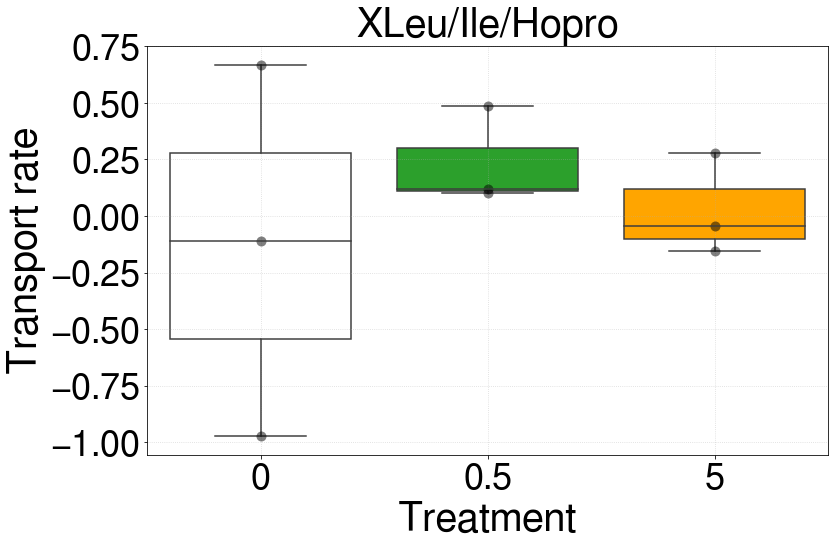

Methylhistidin 0 2
start [1.86 2.35 2.49] 2.35
end [2.83 2.735 2.915] 2.83
cells [830000 830000 830000] 830000.0
Methylhistidin 0 6
start [1.685 1.975 2.17] 1.975
end [1.85 1.995 1.76] 1.85
cells [225000 225000 225000] 225000.0
Methylhistidin 0 7
start [3.335 1.945 1.76] 1.945
end [3.83 2.86 4.04] 3.83
cells [550000 550000 550000] 550000.0
[0.0006939759036144578, -0.0006666666666666666, 0.004112727272727272]

Methylhistidin 0.5 2
start [2.345 2.56 2.295] 2.345
end [3.115 3.03 3.815] 3.115
cells [585000 585000 585000] 585000.0
Methylhistidin 0.5 6
start [1.805 1.475 2.065] 1.805
end [2.28 2.19 1.96] 2.19
cells [600000 600000 600000] 600000.0
Methylhistidin 0.5 7
start [2.275 1.775 1.985] 1.985
end [3.32 3.585 3.075] 3.32
cells [515000 515000 515000] 515000.0
[0.0015794871794871795, 0.00077, 0.003110679611650485]

Methylhistidin 5 2
start [2.185 2.05 2.11] 2.11
end [3.165 3.095 2.59] 3.095
cells [525000 525000 525000] 525000.0
Methylhistidin 5 6
start [2.115 2.01 1.54] 2.01
end [2.045 1.

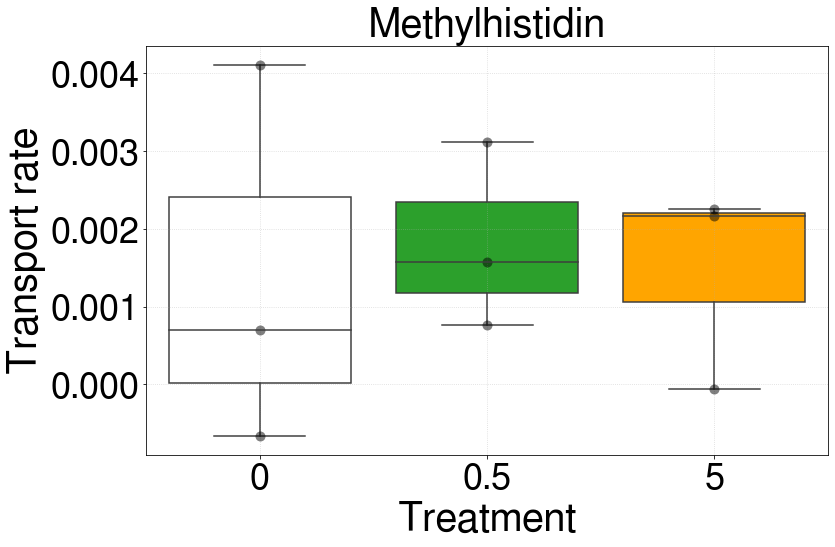

Phenylalanine 0 2
start [146.15 175.31 173.71] 173.71
end [146.03 142.445 162.34] 146.03
cells [830000 830000 830000] 830000.0
Phenylalanine 0 6
start [107.505 138.055 129.09] 129.09
end [96.18 114.55 90.26] 96.18
cells [225000 225000 225000] 225000.0
Phenylalanine 0 7
start [172.25 97.565 91.61] 97.565
end [146.59 102.715 146.14] 146.14
cells [550000 550000 550000] 550000.0
[-0.04001927710843375, -0.17551999999999998, 0.10598181818181815]

Phenylalanine 0.5 2
start [160.27 159.435 156.71] 159.435
end [160.8 160.04 181.4] 160.8
cells [585000 585000 585000] 585000.0
Phenylalanine 0.5 6
start [119.37 115.645 122.555] 119.37
end [122.625 134.045 152.335] 134.045
cells [600000 600000 600000] 600000.0
Phenylalanine 0.5 7
start [102.8 91.32 108.69] 102.8
end [140.545 129.485 120.33] 129.485
cells [515000 515000 515000] 515000.0
[0.002800000000000018, 0.029349999999999963, 0.062178640776699066]

Phenylalanine 5 2
start [160.24 163.43 167.33] 163.43
end [142.79 165.745 148.3] 148.3
cells [5250

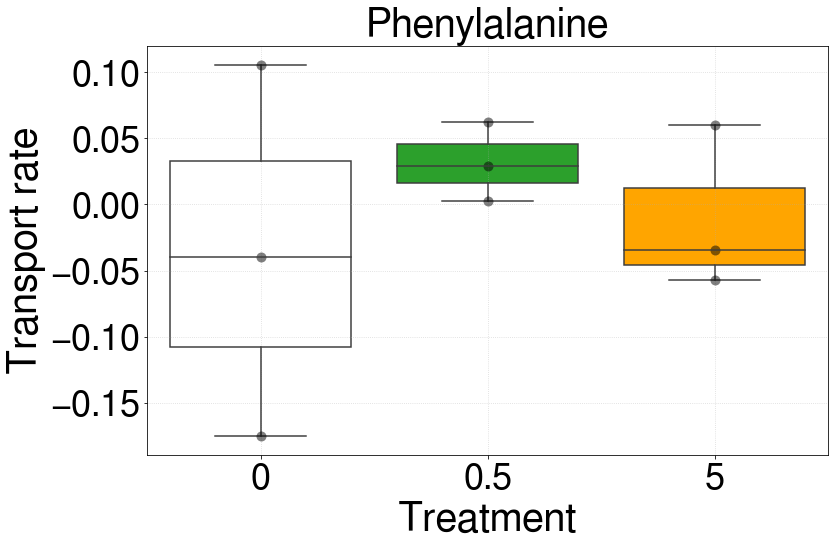

In [11]:
for metabolite in metabolites:
    boxes = []
    for treatment in treatments:
        box = []
        for experiment in experiments:
            
            print(metabolite, treatment, experiment)
            
            # amounts
            sub_exp = df[df['Experiment'] == experiment]
            sub_exp_treatment = sub_exp[sub_exp['Treatment'] == treatment]
            end = sub_exp_treatment[sub_exp_treatment['Timepoint (h)'] == 24]
            start = sub_exp_treatment[sub_exp_treatment['Timepoint (h)'] == 4]
            
            concentration_start = start[metabolite].values
            concentration_end = end[metabolite].values
            cells = end['Cell numbers'].values
            
            # concentration begining
            if concentration_start[0] != '-':
                
                cell_factor = numpy.median(cells)/1e3
                difference = numpy.median(concentration_end) - numpy.median(concentration_start)
                plotting_value = difference/cell_factor * (24/20)
                box.append(plotting_value)
                
                print('start', concentration_start, numpy.median(concentration_start))
                print('end', concentration_end, numpy.median(concentration_end))
                print('cells', cells, numpy.median(cells))
            
        # add box to boxes
        print(box)
        print()
        boxes.append(box)
        
    #
    # statistical test
    #
    print('stats')
    print(boxes)
    stat, pvalue = scipy.stats.mannwhitneyu(boxes[0], boxes[1])
    print('statistics AB', stat, pvalue)
    stat, pvalue = scipy.stats.mannwhitneyu(boxes[0], boxes[2])
    print('statistics AC', stat, pvalue)
     
    #    
    # plot figure
    #
    canvas = seaborn.boxplot(data=boxes)
    canvas.artists[0].set_facecolor('white')
    canvas.artists[1].set_facecolor('#2CA02C')
    canvas.artists[2].set_facecolor('#FFA500')
    
    # scatter
    for i in range(len(boxes)):
        for element in boxes[i]:
            matplotlib.pyplot.plot(i, element, 'o', color='black', alpha=0.5, ms=10, mew=0)
    
    # close figure
    matplotlib.pyplot.title(metabolite_names[metabolite], fontsize=40)
    matplotlib.pyplot.xlabel('Treatment', fontsize=40)
    matplotlib.pyplot.ylabel('Transport rate', fontsize=40)
    matplotlib.pyplot.xticks([0, 1, 2], ['0', '0.5', '5'], fontsize=36)
    matplotlib.pyplot.yticks(fontsize=36)
    matplotlib.pyplot.grid(ls=':', alpha=0.5)
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.show()            